In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#Libraries
import pandas_datareader.data as pdr
import pandas as pd
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
import numpy as np

# set styles for plotting
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Scrapping data

In [34]:
#scrapping data from yahoo finance for Apple stock -12 years data
start = '2010-01-01'
end = '2021-12-31'

df = pdr.DataReader('AAPL','yahoo', start,end)

In [ ]:
# saving as csv file
df.to_csv('/content/drive/MyDrive/stock price prediction/AAPL.csv')

In [35]:
# reading csv file
df = pd.read_csv('/content/drive/MyDrive/stock price prediction/AAPL.csv')

In [4]:
# df.describe()

In [36]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607
...,...,...,...,...,...,...,...
3016,2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
3017,2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
3018,2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
3019,2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251


In [37]:
df.shape

(3021, 7)

Text(0, 0.5, 'Close Price USD ($)')

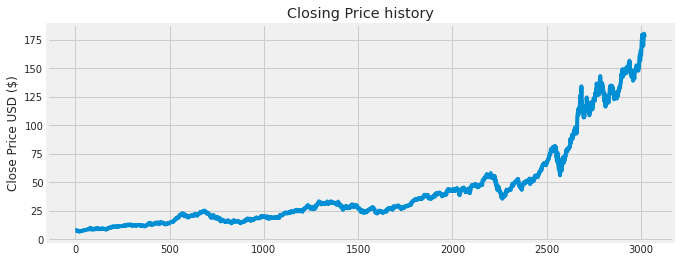

In [38]:
#showing closing price of apple stock pdate

plt.figure(figsize=(10,4))
plt.plot(df['Close'])
plt.title('Closing Price history')
# plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)

## Moving Averages to analyze trend

In [39]:
# using moving averages for 10, 30, 60 days in new columns in the dataframe
# it takes previous days and take average of them and continue to perform in a slidding window manner
mov_avg_day = [10,30,60]

for ma in mov_avg_day:
  colummn_name = f"MA for {ma} days"
  stock_data = df
  stock_data[colummn_name] = stock_data['Adj Close'].rolling(ma).mean()

In [40]:
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 30 days,MA for 60 days
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687,NaN,NaN,NaN
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004,NaN,NaN,NaN
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721,NaN,NaN,NaN
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795,NaN,NaN,NaN
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3016,2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540,174.553609,166.232877,156.377412
3017,2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859,174.908156,167.208300,156.990762
3018,2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749,175.412512,168.186388,157.663950
3019,2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251,175.302652,169.091901,158.284753


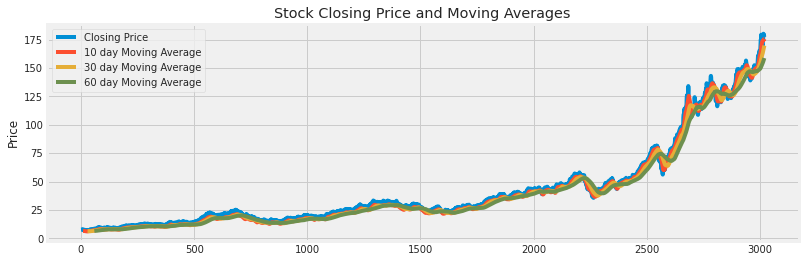

In [41]:
#plot all 3 movingaverages along with closing price
plt.figure(figsize=(12,4))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['MA for 10 days'], label='10 day Moving Average')
plt.plot(stock_data['MA for 30 days'], label='30 day Moving Average')
plt.plot(stock_data['MA for 60 days'], label='60 day Moving Average')

# plt.plot(stock_data['MA for 100 days'], label='30 day Moving Average')
# plt.plot(stock_data['MA for 200 days'], label='30 day Moving Average')
plt.title('Stock Closing Price and Moving Averages')
plt.ylabel('Price')
plt.legend()
plt.show()


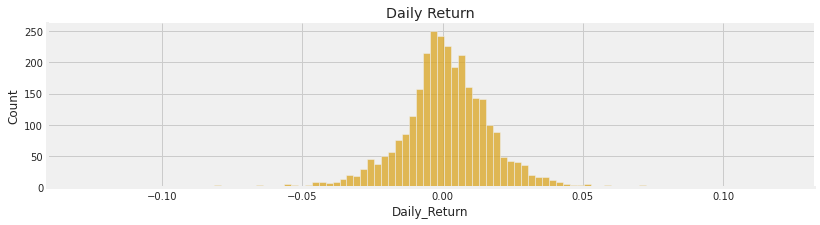

In [42]:
# Daily return - gives us an idea if this will be normally distributed or skewed
# checking how much variability / whether it is normally distributed or not-> then only our forecasting will give accurate result

stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
sns.displot(stock_data['Daily_Return'].dropna(), bins=100, color='goldenrod', height=3, aspect=23/6)
plt.title('Daily Return')
plt.show()

## Data Preprocessing



*   Creating dataset based on sliding window concept and taking previous 60 days data
*   spltting data based on time based splitting



In [43]:
#Create training and test datasets
#create new dataframe with only the Close column
data = stock_data.filter(['Close'])

#convert the dataframe to a numpy array - (2D)
data_close = data.values
print('Closing Price: \n',data_close)

Closing Price: 
 [[  7.64321423]
 [  7.65642881]
 [  7.53464317]
 ...
 [179.38000488]
 [178.19999695]
 [177.57000732]]


In [44]:
#get the number of rows to train the model 
# (80% train data , 20% test data)

train_size = int(np.ceil(len(data_close) * 0.80))
print('Data size:',len(data_close))
print('train size:',train_size)
print('test size:',len(data_close)-train_size)

Data size: 3021
train size: 2417
test size: 604


## Scaling Data

In [45]:
# LSTM are sensitive to the scale of the data --> applying min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_close)
scaled_data

array([[0.00452113],
       [0.00459731],
       [0.00389525],
       ...,
       [0.9945236 ],
       [0.98772127],
       [0.9840896 ]])

## Creating Training Dataset

In [46]:
#Create the scaled training dataset

#train_data: 0->2417(not including last element)
train_data = scaled_data[0:int(train_size), :]
print(train_data.shape)
#Split the data into X_train and y_train datasets
x_train =[]
y_train =[]

# i: 60 ->2417(not including last element)
#x_train:0->59(including both), y_train:60
#x_train:1->60(including both), y_train:61
#.......................................
#x_train:2357->2416(including both) , y_train:2417
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train),np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))


(2417, 1)


In [47]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

x_train:  (2357, 60, 1)
y_train:  (2357,)


In [48]:
# Create LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


LSTM_model = Sequential()
LSTM_model.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1],1)))
LSTM_model.add(LSTM(64, return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))

#compile the model
LSTM_model.compile(loss = 'mean_squared_error',optimizer = 'adam')

# to get model summary
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [49]:
#fit the model with x_train and y_train
LSTM_model.fit(x_train, y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 [==============================] - 3s 8ms/step - loss: 0.0017
Epoch 2/100
37/37 [==============================] - 0s 8ms/step - loss: 5.7595e-05
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 3.8840e-05
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 3.8778e-05
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 3.7626e-05
Epoch 6/100
37/37 [==============================] - 0s 7ms/step - loss: 3.5486e-05
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 3.7515e-05
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 3.3556e-05
Epoch 9/100
37/37 [==============================] - 0s 8ms/step - loss: 3.4618e-05
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 3.1484e-05
Epoch 11/100
37/37 [==============================] - 0s 8ms/step - loss: 3.0515e-05
Epoch 12/100
37/37 [==============================] - 0s 8ms/step - loss: 2.91

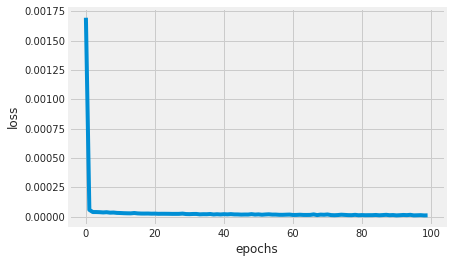

In [50]:
#plotting loss, it shows that loss has decreased significantly and model trained well (elbow method)
loss = LSTM_model.history.history['loss']
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss)

In [51]:
LSTM_model.save('/content/drive/MyDrive/stock price prediction/Lstm_model.h5')

## Creating Test Dataset

In [52]:
#Create the testing data set 
#Create a new array containing scaled values 

#from last 60 values of train to last value
test_data = scaled_data[train_size - 60 : , :]
print('test data:', test_data.shape)
#Create dataset x_test and y_test

x_test =[]
# for y_test can take original close price which was in numpy array form(so we don't need to inverse scaling)
y_test = data_close[train_size:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#converting to numpy array
x_test = np.array(x_test)

#reshaping the data in 3D form
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get model predicticted price
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


test data: (664, 1)


In [53]:
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_test:  (604, 60, 1)
y_test:  (604, 1)


In [54]:
#get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.8105836261976633

In [55]:
#get mape(Mean Absolute Percentage Error)
MAPE =np.mean(np.abs((predictions - y_test) / y_test))*100
MAPE

2.7854065487419852

## Observation


*   It means we have error of about 2.78 % which is pretty much accurate
*   accuracy of model is around 98 - 99%

*   AS per rmse it is much closer to 0 and showing most of data was predicted accurately with very small error




## Adjusted R-square formula

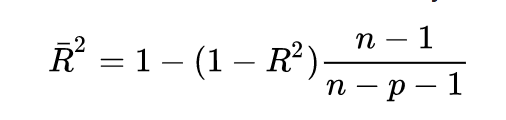


*   n is number of observations in sample -> (604)
*   p is number of independent variables in model -> (60)



In [56]:
from sklearn.metrics import r2_score
r2_value = r2_score(y_test, predictions)
print('r-square :', r2_value)
print('adjusted r-square:',1-(1-r2_score(y_test, predictions))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1)))

r-square : 0.9878824350893185
adjusted r-square: 0.9865434776406244


In [57]:
validation = data[train_size :]
validation['Predictions'] = predictions
validation

,Close,Predictions
2417,50.119999,49.710243
2418,52.242500,49.589439
2419,50.687500,50.745876
2420,50.435001,50.448952
2421,51.625000,49.880081
...,...,...
3016,180.330002,172.337540
3017,179.289993,175.381653
3018,179.380005,175.535583
3019,178.199997,175.044235


## Stock Price Forecast 


           Close  Predictions
2417   50.119999    49.710243
2418   52.242500    49.589439
2419   50.687500    50.745876
2420   50.435001    50.448952
2421   51.625000    49.880081
...          ...          ...
3016  180.330002   172.337540
3017  179.289993   175.381653
3018  179.380005   175.535583
3019  178.199997   175.044235
3020  177.570007   173.763000

[604 rows x 2 columns]


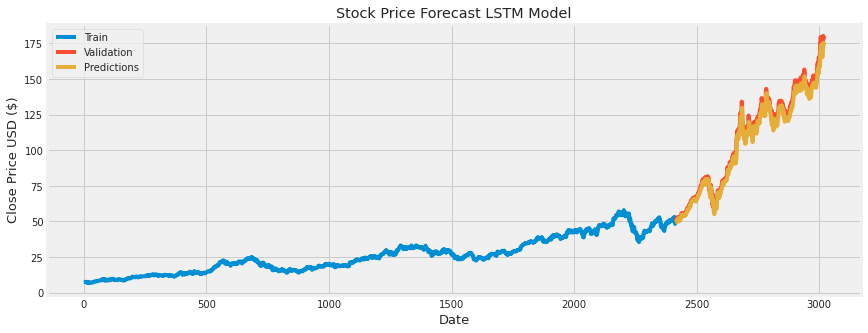

In [58]:
# to remove pandas warning on copy of a slice 
pd.options.mode.chained_assignment =None

# plot data 
train = data[:train_size]
validation = data[train_size :]
validation['Predictions'] = predictions
print(validation)
#visualize the data
plt.figure(figsize=(13,5))
plt.title('Stock Price Forecast LSTM Model')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train','Validation', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
!python --version

Python 3.7.12


In [ ]:
tf.__version__

'2.8.0'